# CNN CIFAR-10 
---
*Mark Golovatskikh*




# Imports

In [1]:
# Imports
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.metrics import Precision, Recall
import matplotlib.pyplot as plt

  # Load data

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [32]:
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [3]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
# train_labels = tf.keras.utils.to_categorical(train_labels, 10)
# test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Visualise data

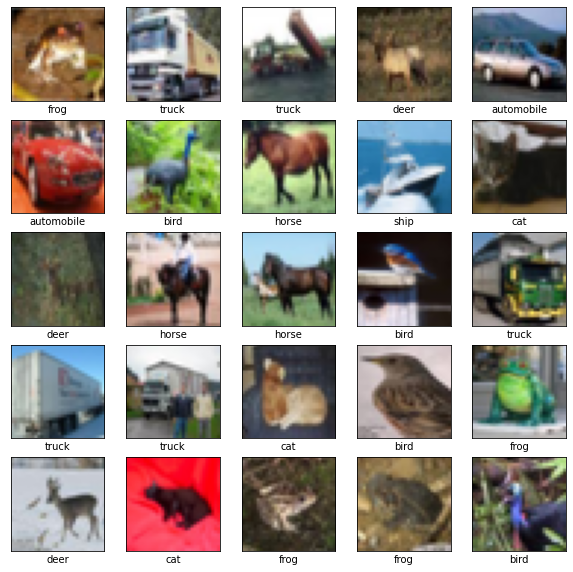

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# CREATE CNN

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

# Run model

In [15]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 31s 627us/sample - loss: 1.5181 - accuracy: 0.4452 - val_loss: 1.2238 - val_accuracy: 0.5713
Epoch 2/10
50000/50000 [==============================] - 30s 601us/sample - loss: 1.1639 - accuracy: 0.5877 - val_loss: 1.0834 - val_accuracy: 0.6128
Epoch 3/10
50000/50000 [==============================] - 35s 706us/sample - loss: 1.0295 - accuracy: 0.6391 - val_loss: 0.9793 - val_accuracy: 0.6561
Epoch 4/10
50000/50000 [==============================] - 37s 748us/sample - loss: 0.9271 - accuracy: 0.6745 - val_loss: 0.9443 - val_accuracy: 0.6673
Epoch 5/10
50000/50000 [==============================] - 35s 699us/sample - loss: 0.8520 - accuracy: 0.7039 - val_loss: 0.9209 - val_accuracy: 0.6824
Epoch 6/10
50000/50000 [==============================] - 35s 709us/sample - loss: 0.7947 - accuracy: 0.7220 - val_loss: 0.8929 - val_accuracy: 0.6901
Epoch 7/10
50000/50000 [====================

# Results

10000/1 - 2s - loss: 1.0142 - accuracy: 0.7045


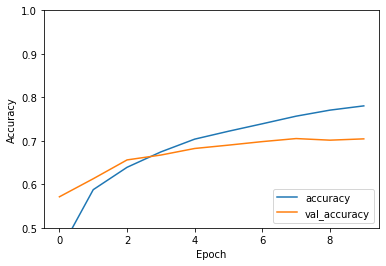

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [17]:
pred = model.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(tf.keras.utils.to_categorical(test_labels), axis=1)
print('test:')
print(classification_report(Y_true, Y_pred_classes))
print(confusion_matrix(Y_true, Y_pred_classes))

test:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      1000
           1       0.86      0.79      0.83      1000
           2       0.65      0.54      0.59      1000
           3       0.49      0.61      0.55      1000
           4       0.62      0.70      0.66      1000
           5       0.74      0.44      0.55      1000
           6       0.79      0.76      0.78      1000
           7       0.63      0.83      0.72      1000
           8       0.83      0.79      0.81      1000
           9       0.80      0.78      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.72      0.70      0.70     10000
weighted avg       0.72      0.70      0.70     10000

[[791  12  29  21  25   6   7  29  50  30]
 [ 29 790   8  13  14   3  12  11  27  93]
 [ 64   3 542  81 129  34  50  76  14   7]
 [ 27   5  63 615  73  66  47  81  11  12]
 [ 17   5  44  64 703   7  41 110   6   3]
 [ 10   0  58 267  6

# Transfer learning for CIFAR-100

## Add superclass vichicles2 - lawn-mower, rocket, streetcar, tank, tractor

In [23]:
from keras.datasets import cifar100
(train_images100, train_labels100), (test_images100, test_labels100) = cifar100.load_data(label_mode= 'fine')

Using TensorFlow backend.


169009152/169001437 [==============================] - 90s 1us/step


In [53]:
import copy

train_imagesAll = list(copy.deepcopy(train_images))
train_labelsAll = list(copy.deepcopy(train_labels))
test_imagesAll = list(copy.deepcopy(test_images))
test_labelsAll = list(copy.deepcopy(test_labels))
print(type(train_labelsAll[0]))

<class 'numpy.ndarray'>


In [25]:
test_labels100

array([[49],
       [33],
       [72],
       ...,
       [51],
       [42],
       [70]])

In [43]:
coarse_label = [
'apple', # id 0
'aquarium_fish',
'baby',
'bear',
'beaver',
'bed',
'bee',
'beetle',
'bicycle',
'bottle',
'bowl',
'boy',
'bridge',
'bus',
'butterfly',
'camel',
'can',
'castle',
'caterpillar',
'cattle',
'chair',
'chimpanzee',
'clock',
'cloud',
'cockroach',
'couch',
'crab',
'crocodile',
'cup',
'dinosaur',
'dolphin',
'elephant',
'flatfish',
'forest',
'fox',
'girl',
'hamster',
'house',
'kangaroo',
'computer_keyboard',
'lamp',
'lawn_mower',
'leopard',
'lion',
'lizard',
'lobster',
'man',
'maple_tree',
'motorcycle',
'mountain',
'mouse',
'mushroom',
'oak_tree',
'orange',
'orchid',
'otter',
'palm_tree',
'pear',
'pickup_truck',
'pine_tree',
'plain',
'plate',
'poppy',
'porcupine',
'possum',
'rabbit',
'raccoon',
'ray',
'road',
'rocket',
'rose',
'sea',
'seal',
'shark',
'shrew',
'skunk',
'skyscraper',
'snail',
'snake',
'spider',
'squirrel',
'streetcar',
'sunflower',
'sweet_pepper',
'table',
'tank',
'telephone',
'television',
'tiger',
'tractor',
'train',
'trout',
'tulip',
'turtle',
'wardrobe',
'whale',
'willow_tree',
'wolf',
'woman',
'worm',
]

In [44]:
lawn_mower_label = coarse_label.index('lawn_mower')
rocket_label = coarse_label.index('rocket')
streetcar = coarse_label.index('streetcar')
tank = coarse_label.index('tank')
tractor = coarse_label.index('tractor')

In [49]:
vehicles2 = [lawn_mower_label, rocket_label, streetcar, tank, tractor]
vehicles2

[41, 69, 81, 85, 89]

In [57]:
if 69 in vehicles2:
    print('yeah')

yeah


In [60]:
for ind in range (len(train_images100)):
    class_label = train_labels100[ind][0]
    if class_label in vehicles2:
        train_imagesAll.append(train_images100[ind])
        train_labelsAll.append(np.array([10+vehicles2.index(class_label)], dtype=np.uint8))


print(np.unique(train_labelsAll))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [39]:
for ind in range (len(train_images100)):
    if train_labels100[ind] == 96 :
        train_imagesAll.append(train_images100[ind])
        train_labelsAll.append(np.array([10], dtype=np.uint8))
    elif train_labels100[ind] == 97 :
        train_imagesAll.append(train_images100[ind])
        train_labelsAll.append(np.array([11], dtype=np.uint8))
    elif train_labels100[ind] == 98 :
        train_imagesAll.append(train_images100[ind])
        train_labelsAll.append(np.array([12], dtype=np.uint8))
    elif train_labels100[ind] == 99 :
        train_imagesAll.append(train_images100[ind])
        train_labelsAll.append(np.array([13], dtype=np.uint8))
    elif train_labels100[ind] == 100 :
        train_imagesAll.append(train_images100[ind])
        train_labelsAll.append(np.array([14], dtype=np.uint8))

for ind in range (len(test_images100)):
    if test_labels100[ind] == 54 :
        test_imagesAll.append(test_images100[ind])
        test_labelsAll.append(np.array([10], dtype=np.uint8))
    elif test_labels100[ind] == 62 :
        test_imagesAll.append(test_images100[ind])
        test_labelsAll.append(np.array([11], dtype=np.uint8))
    elif test_labels100[ind] == 70 :
        test_imagesAll.append(test_images100[ind])
        test_labelsAll.append(np.array([12], dtype=np.uint8))
    elif test_labels100[ind] == 82 :
        test_imagesAll.append(test_images100[ind])
        test_labelsAll.append(np.array([13], dtype=np.uint8))
    elif test_labels100[ind] == 92 :
        test_imagesAll.append(test_images100[ind])
        test_labelsAll.append(np.array([14], dtype=np.uint8))
print(np.unique(train_labelsAll))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


In [40]:
train_imagesAll = np.array(train_imagesAll)
train_labelsAll = np.array(train_labelsAll)
test_imagesAll = np.array(test_imagesAll)
test_labelsAll = np.array(test_labelsAll)

In [41]:
train_imagesAll, test_imagesAll = train_imagesAll / 255. , test_imagesAll / 255.

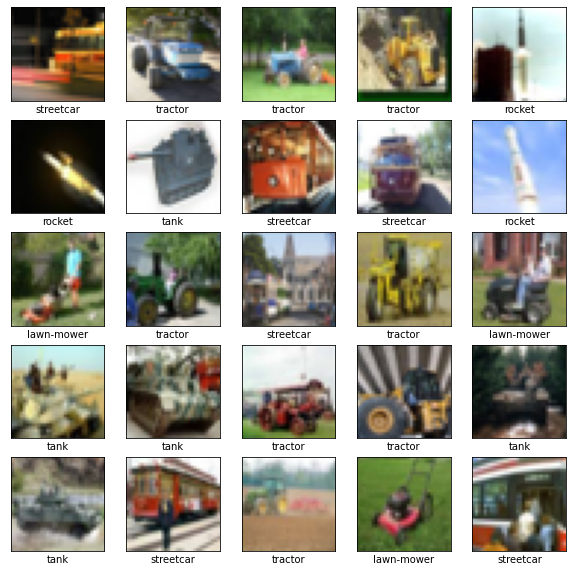

In [61]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck', 'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']

plt.figure(figsize=(10,10))
n = 50000
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_imagesAll[n+i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labelsAll[n+i][0]])
plt.show()

## create model with replaced last layer

In [20]:
model.trainable = False

In [21]:
model_2 = models.Sequential()
for layer in model.layers[:-1]:
    model_2.add(layer)
model_2.add(layers.Dense(15))
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [30]:
train_labelsAll.shape

(52500, 1)

In [34]:
model_2.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model_2.fit(train_imagesAll, train_labelsAll, epochs=10, validation_data=(test_imagesAll, test_labelsAll))

Train on 52500 samples, validate on 10500 samples
Epoch 1/10
52500/52500 [==============================] - 18s 336us/sample - loss: 2.3432 - accuracy: 0.1039 - val_loss: 2.2760 - val_accuracy: 0.1132
Epoch 2/10
52500/52500 [==============================] - 17s 324us/sample - loss: 2.2688 - accuracy: 0.1218 - val_loss: 2.2630 - val_accuracy: 0.1153
Epoch 3/10
52500/52500 [==============================] - 18s 335us/sample - loss: 2.2591 - accuracy: 0.1286 - val_loss: 2.2561 - val_accuracy: 0.1186
Epoch 4/10
52500/52500 [==============================] - 18s 349us/sample - loss: 2.2529 - accuracy: 0.1361 - val_loss: 2.2473 - val_accuracy: 0.1520
Epoch 5/10
52500/52500 [==============================] - 21s 400us/sample - loss: 2.2482 - accuracy: 0.1405 - val_loss: 2.2423 - val_accuracy: 0.1587
Epoch 6/10
52500/52500 [==============================] - 21s 403us/sample - loss: 2.2448 - accuracy: 0.1437 - val_loss: 2.2400 - val_accuracy: 0.1639
Epoch 7/10
52500/52500 [====================

329/329 - 4s - loss: 2.2535 - accuracy: 0.1160


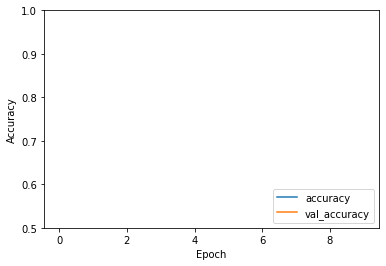

In [54]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labelsAll, verbose=2)

In [56]:
pred = model.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(tf.keras.utils.to_categorical(test_labelsAll), axis=1)

print(classification_report(Y_true, Y_pred_classes))
print(confusion_matrix(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.10      1.00      0.18      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000
          10       0.49      0.60      0.54       100
          11       0.35      0.59      0.44       100
          12       0.20      0.08      0.11       100
          13       0.66      0.75      0.70       100
          14       0.30      0.16      0.21       100

    accuracy                           0.12     10500
   macro avg       0.14      0.21      0.15     10500
weighted avg       0.03   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
np.argmax(pred, axis=1) 

array([ 3,  3,  3, ..., 13, 14, 11])

In [68]:
Y_true

array([ 3,  8,  8, ..., 11, 10, 12])

In [ ]:
pred = model.predict(train_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(tf.keras.utils.to_categorical(train_labels), axis=1)
print('train:')
print(classification_report(Y_true, Y_pred_classes))
print(confusion_matrix(Y_true, Y_pred_classes))